<a href="https://colab.research.google.com/github/G-Gaddu/Quant-Material/blob/main/SCV%20Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Using Machine Learning to create a trading/investment strategy

In [34]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')

In [35]:
# Load the data
from google.colab import files
files.upload()

Saving SHELL.csv to SHELL (1).csv


{'SHELL (1).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n6/19/2023,2323,2358,2315,2340,2239.856934,14725904\r\n6/20/2023,2339.5,2345.725098,2309,2321.5,2222.148682,25853669\r\n6/21/2023,2319.5,2363.5,2319.5,2363.5,2262.351074,6968504\r\n6/22/2023,2358,2358,2324,2333.5,2233.635254,12103766\r\n6/23/2023,2326.5,2336,2291.5,2318.5,2219.2771,9107176\r\n6/26/2023,2332,2352.5,2289.5,2341,2240.814209,10383466\r\n6/27/2023,2351,2357.745117,2310.5,2319.5,2220.234619,15218123\r\n6/28/2023,2321.5,2336.5,2297.5,2323.5,2224.062988,10719622\r\n6/29/2023,2323.5,2344.889893,2314.5,2325.5,2225.977539,12445453\r\n6/30/2023,2334.5,2351.5,2329,2342.5,2242.25,12447479\r\n7/3/2023,2357.5,2404,2350,2379.5,2277.666504,16897005\r\n7/4/2023,2377,2390.5,2368,2380.5,2278.623535,6393436\r\n7/5/2023,2376,2377.659912,2320.5,2329,2229.327637,15663783\r\n7/6/2023,2312.5,2318.5,2264,2264.5,2167.588135,10705039\r\n7/7/2023,2256.5,2300.5,2251,2282.5,2184.817871,11206305\r\n7/10/2023,2291.5,2328.5,2289.5,2305,2206.

In [43]:
# Read in the csv file
df = pd.read_csv('SHELL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/19/2023,2323.0,2358.000000,2315.0,2340.0,2239.856934,14725904.0
1,6/20/2023,2339.5,2345.725098,2309.0,2321.5,2222.148682,25853669.0
2,6/21/2023,2319.5,2363.500000,2319.5,2363.5,2262.351074,6968504.0
3,6/22/2023,2358.0,2358.000000,2324.0,2333.5,2233.635254,12103766.0
4,6/23/2023,2326.5,2336.000000,2291.5,2318.5,2219.277100,9107176.0


In [44]:
# Set the date to be the index
df.index = pd.to_datetime(df['Date'])
# Drop the date column
df = df.drop(['Date'], axis = 'columns')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-19,2323.0,2358.000000,2315.0,2340.0,2239.856934,14725904.0
2023-06-20,2339.5,2345.725098,2309.0,2321.5,2222.148682,25853669.0
2023-06-21,2319.5,2363.500000,2319.5,2363.5,2262.351074,6968504.0
2023-06-22,2358.0,2358.000000,2324.0,2333.5,2233.635254,12103766.0
2023-06-23,2326.5,2336.000000,2291.5,2318.5,2219.277100,9107176.0


In [45]:
# Creat the independent variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [46]:
# Store the independent variables in a variable called 'X'
X = df[['Open-Close', 'High-Low','Close']]
X

,Open-Close,High-Low,Close
Date,,,
2023-06-19,-17.0,43.000000,2340.0
2023-06-20,18.0,36.725098,2321.5
2023-06-21,-44.0,44.000000,2363.5
2023-06-22,24.5,34.000000,2333.5
2023-06-23,8.0,44.500000,2318.5
...,...,...,...
2024-06-11,11.5,38.500000,2750.5
2024-06-12,14.5,35.500000,2744.5
2024-06-13,19.5,35.500000,2724.0


In [47]:
y = np.where(df.Close.shift(-1) > df.Close, 1, 0)
# Show the data
y.size

253

In [48]:
# Get the percentage to split the data (90% train data set and 10% test data set)
percentage_split = 0.9
row = int(df.shape[0] * percentage_split)
# Create training date set
X_train = X[:row]
Y_train = y[:row]
X_test = X[row:]
Y_test = y[row:]

In [49]:
# Check for NaNs
print(X_train.isna().sum())

Open-Close    1
High-Low      1
Close         1
dtype: int64


In [50]:
# Find out which row contains the NaNs
X_train[X_train.isna().any(axis=1)]

,Open-Close,High-Low,Close
Date,,,
2023-10-13,NaN,NaN,NaN


In [55]:
# Fill the NaNs with the mean
X_train = X_train.fillna(X_train.mean())

In [56]:
X_train[X_train.isna().any(axis=1)]

,Open-Close,High-Low,Close
Date,,,


In [59]:
from sklearn.svm import SVC
model = SVC()
# Train the model
model.fit(X_train[['Open-Close', 'High-Low']], Y_train)

SVC()

In [60]:
# Check the score
model.score(X_train[['Open-Close', 'High-Low']], Y_train)

0.5594713656387665

In [62]:
model.score(X_test[['Open-Close', 'High-Low']], Y_test)

0.46153846153846156

In [64]:
X = X.fillna(X.mean())

In [68]:
X['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])
X['Predictions']

Date
2023-06-19    1
2023-06-20    1
2023-06-21    1
2023-06-22    0
2023-06-23    1
             ..
2024-06-11    1
2024-06-12    1
2024-06-13    1
2024-06-14    1
2024-06-17    1
Name: Predictions, Length: 253, dtype: int64

In [70]:
X['Return'] = X['Close'].pct_change(1)

In [71]:
X['Strat_Return'] = X['Predictions'].shift(1)*X['Return']
# Show the strategy returns
X['Strat_Return']

Date
2023-06-19         NaN
2023-06-20   -0.007906
2023-06-21    0.018092
2023-06-22   -0.012693
2023-06-23   -0.000000
                ...   
2024-06-11   -0.002539
2024-06-12   -0.002181
2024-06-13   -0.007469
2024-06-14   -0.004772
2024-06-17    0.005533
Name: Strat_Return, Length: 253, dtype: float64

In [72]:
# Calculate the Cumulative Returns
X['Cumul_Ret']  = X['Return'].cumsum()
X['Cumul_Strategy'] = X['Strat_Return'].cumsum()

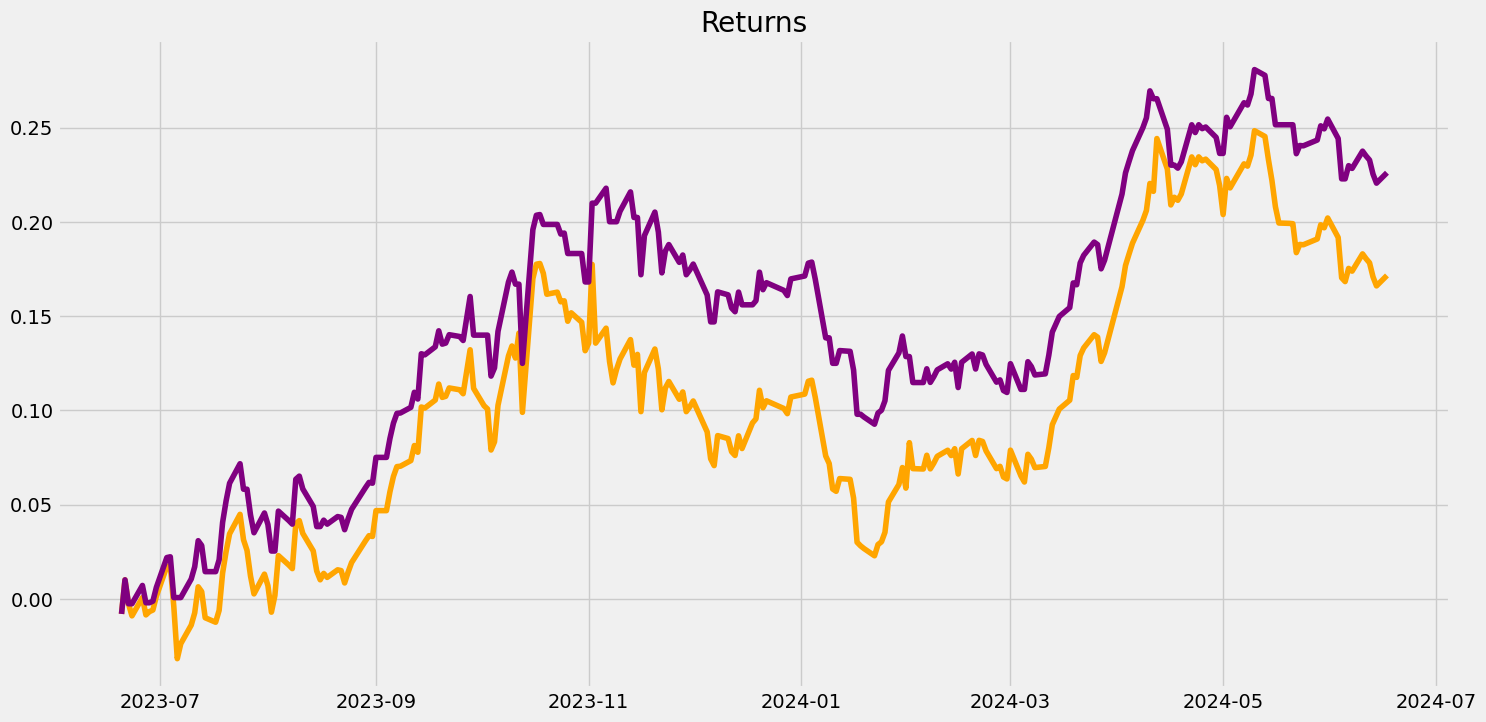

In [73]:
plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(X['Cumul_Ret'], color = 'orange', label = 'Stock Returns')
plt.plot(X['Cumul_Strategy'], color = 'purple', label = 'Strategy Returns')